<a href="https://colab.research.google.com/github/seeratfatima19/Object-detection/blob/main/Object_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [21]:
from google.colab import drive

In [6]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 87314, done.
remote: Counting objects: 100% (1068/1068), done.
remote: Compressing objects: 100% (513/513), done.
remote: Total 87314 (delta 629), reused 948 (delta 544), pack-reused 86246
Receiving objects: 100% (87314/87314), 599.30 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (62488/62488), done.


In [31]:
#for showing image
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

In [14]:
!sudo apt install -y protobuf-compiler


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [12]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .

/content/models/research


In [13]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [22]:
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
PATH_TO_LABELS = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [17]:
model_name='SSD MobileNet V2 FPNLite 640x640'
model_handle='https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1'

print('Selected model:'+ model_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))


Selected model:SSD MobileNet V2 FPNLite 640x640
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1


In [18]:
hub_load = hub.load(model_handle)

In [52]:
# np.array(Image.open('kolala.jpeg').resize((200,200)))

# load image as numpy array
def load_img_as_np_array(img_path):

  image_data = tf.io.gfile.GFile(img_path, 'rb').read()
  image = Image.open(BytesIO(image_data))
  (im_width, im_height) = image.size

  return np.array(image.getdata()).reshape((1, im_height, im_width, 3)).astype(np.uint8)


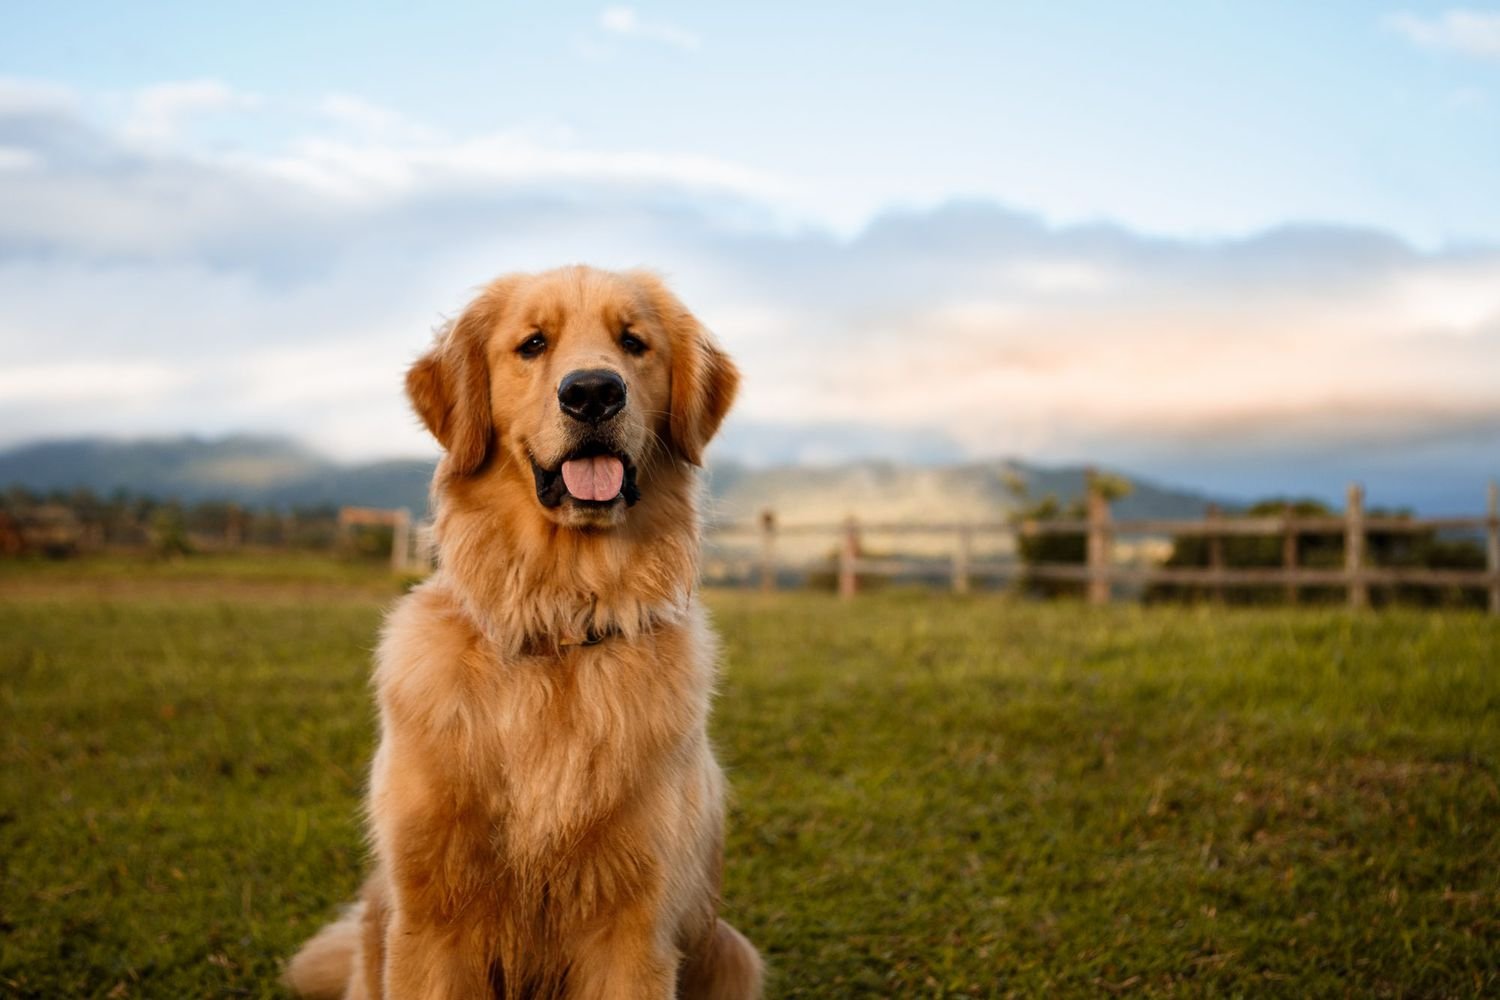

In [73]:
image_path = '/content/drive/MyDrive/dog-image.jpg'
im= Image.open(r'/content/drive/MyDrive/dog-image.jpg')
im

In [74]:
img_np = load_img_as_np_array(image_path)
print(img_np)

[[[[180 214 239]
   [180 214 239]
   [180 214 239]
   ...
   [178 212 239]
   [178 212 239]
   [178 212 239]]

  [[180 214 239]
   [180 214 239]
   [180 214 239]
   ...
   [178 212 239]
   [178 212 239]
   [178 212 239]]

  [[180 214 239]
   [180 214 239]
   [180 214 239]
   ...
   [178 214 240]
   [178 214 240]
   [178 214 240]]

  ...

  [[ 21  19   6]
   [ 16  14   0]
   [ 16  14   0]
   ...
   [ 34  30   1]
   [ 34  30   1]
   [ 35  31   2]]

  [[ 14  12   0]
   [ 10   8   0]
   [ 15  12   0]
   ...
   [ 33  29   0]
   [ 33  29   0]
   [ 34  30   1]]

  [[  9   6   0]
   [  6   4   0]
   [ 13   9   0]
   ...
   [ 30  27   0]
   [ 30  26   0]
   [ 33  29   0]]]]


In [75]:
results= hub_load(img_np)
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())


dict_keys(['detection_anchor_indices', 'detection_multiclass_scores', 'detection_boxes', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_scores', 'num_detections'])


In [62]:
COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (0, 5),
 (0, 6),
 (5, 7),
 (7, 9),
 (6, 8),
 (8, 10),
 (5, 6),
 (5, 11),
 (6, 12),
 (11, 12),
 (11, 13),
 (13, 15),
 (12, 14),
 (14, 16)]

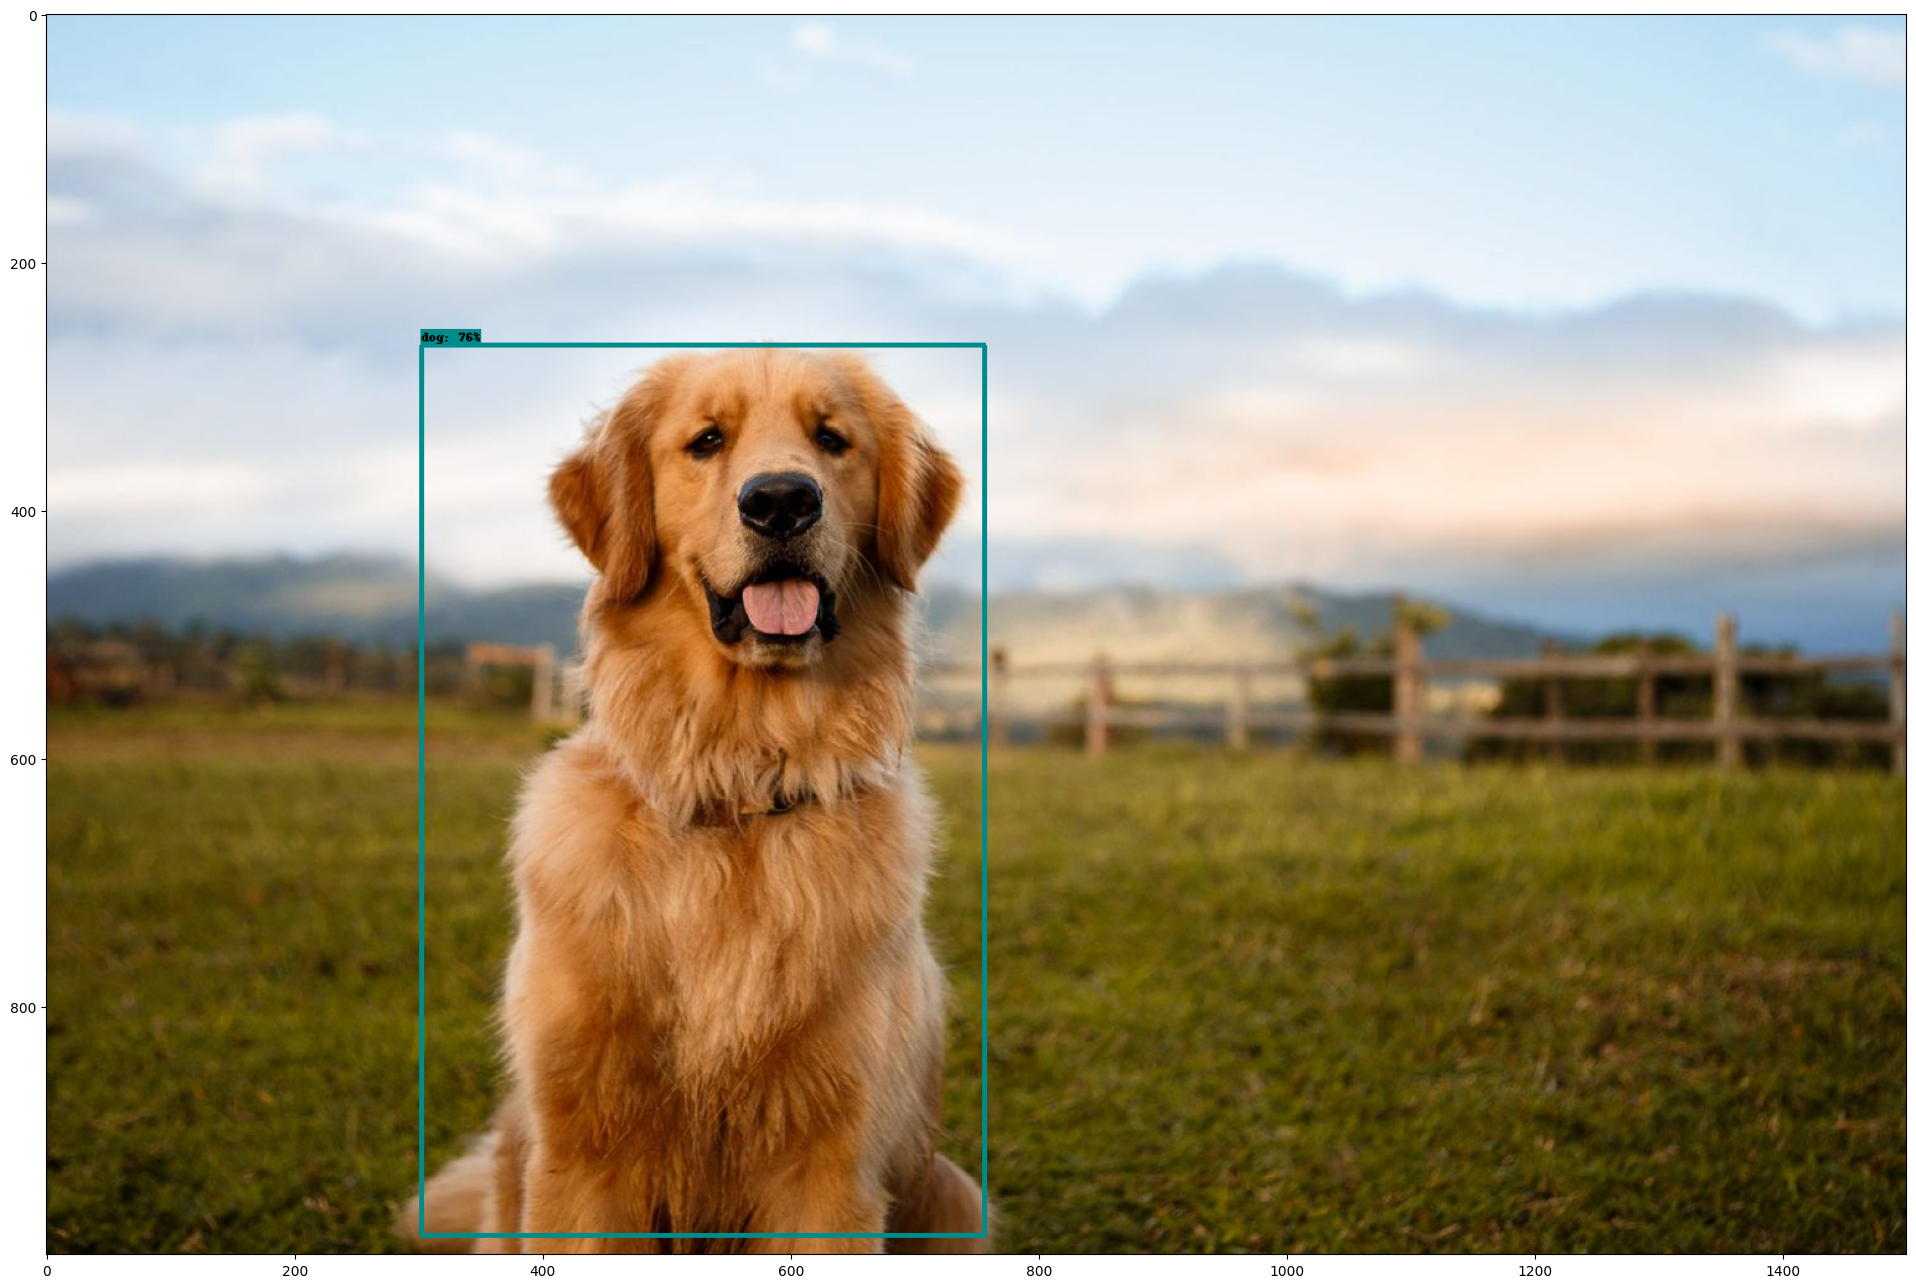

In [76]:
label_id_offset = 0
image_np_with_detections = img_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in results:
  keypoints = result['detection_keypoints'][0]
  keypoint_scores = result['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()